In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

In [5]:
# Hurricane Dataset
hurricane_df = pd.read_csv('hurr_data.csv', skiprows=[1], low_memory=False)
hurricane_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'hurr_data.csv'

In [ ]:
hurricane_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701568 entries, 0 to 701567
Data columns (total 163 columns):
 #    Column            Dtype  
---   ------            -----  
 0    SID               object 
 1    SEASON            int64  
 2    NUMBER            int64  
 3    BASIN             object 
 4    SUBBASIN          object 
 5    NAME              object 
 6    ISO_TIME          object 
 7    NATURE            object 
 8    LAT               float64
 9    LON               float64
 10   WMO_WIND          object 
 11   WMO_PRES          object 
 12   WMO_AGENCY        object 
 13   TRACK_TYPE        object 
 14   DIST2LAND         int64  
 15   LANDFALL          object 
 16   IFLAG             object 
 17   USA_AGENCY        object 
 18   USA_ATCF_ID       object 
 19   USA_LAT           object 
 20   USA_LON           object 
 21   USA_RECORD        object 
 22   USA_STATUS        object 
 23   USA_WIND          object 
 24   USA_PRES          object 
 25   USA_SSHS          

In [ ]:
# On observation of Dataset, there exists no nulls due to object type of attributes. 
# So we replace the empty space value in each attribute with NaN
hurricane_df.replace(' ', np.nan, inplace=True)

In [ ]:
# Get % of null values in each attribute
(hurricane_df.isnull().sum()/len(hurricane_df)).round(2)*100

SID                   0.0
SEASON                0.0
NUMBER                0.0
BASIN                18.0
SUBBASIN             13.0
NAME                  0.0
ISO_TIME              0.0
NATURE                0.0
LAT                   0.0
LON                   0.0
WMO_WIND             78.0
WMO_PRES             78.0
WMO_AGENCY           70.0
TRACK_TYPE            0.0
DIST2LAND             0.0
LANDFALL              2.0
IFLAG                 0.0
USA_AGENCY           69.0
USA_ATCF_ID          37.0
USA_LAT              37.0
USA_LON              37.0
USA_RECORD          100.0
USA_STATUS           66.0
USA_WIND             46.0
USA_PRES             80.0
USA_SSHS              1.0
USA_R34_NE           91.0
USA_R34_SE           92.0
USA_R34_SW           92.0
USA_R34_NW           92.0
USA_R50_NE           96.0
USA_R50_SE           96.0
USA_R50_SW           96.0
USA_R50_NW           96.0
USA_R64_NE           97.0
USA_R64_SE           97.0
USA_R64_SW           98.0
USA_R64_NW           97.0
USA_POCI    

In [ ]:
# We impute values into 'USA_WIND' and 'USA_PRES' from the other wind and pressure attributes present in the datset
# We assume that the scale of measurement used to quantify the wind and pressure values are more or less the same

# Store wind and pressure attributes present in the database in lists
wind_cols = ['WMO_WIND', 'TOKYO_WIND', 'CMA_WIND', 'HKO_WIND', 'NEWDELHI_WIND', 'REUNION_WIND', 
             'BOM_WIND', 'NADI_WIND', 'DS824_WIND', 'TD9636_WIND', 'NEUMANN_WIND']
pres_cols = ['WMO_PRES', 'TOKYO_PRES', 'CMA_PRES', 'HKO_PRES', 'NEWDELHI_PRES', 'REUNION_PRES', 
             'BOM_PRES', 'NADI_PRES', 'DS824_PRES', 'TD9636_PRES', 'NEUMANN_PRES']

# Impute values in 'USA_WIND' and 'USA_PRES' respectively
for i in wind_cols:
    hurricane_df['USA_WIND'].fillna(hurricane_df[i], inplace=True)
for i in pres_cols:    
    hurricane_df['USA_PRES'].fillna(hurricane_df[i], inplace=True)

In [ ]:
# We extract columns that are relevant for our purposes and discard the rest
hurricane_df = hurricane_df[['SID', 'SEASON', 'NUMBER','BASIN', 'SUBBASIN', 'NAME','ISO_TIME', 'NATURE', 'LAT','LON', 'TRACK_TYPE', 'DIST2LAND','LANDFALL','USA_WIND','USA_PRES','USA_SSHS', 'STORM_SPEED', 'STORM_DIR']].copy()
hurricane_df

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,TRACK_TYPE,DIST2LAND,LANDFALL,USA_WIND,USA_PRES,USA_SSHS,STORM_SPEED,STORM_DIR
0,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 03:00:00,NR,10.9000,80.3000,main,43,0,NaN,NaN,-1,9,266
1,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 06:00:00,NR,10.8709,79.8265,main,0,0,NaN,NaN,-1,9,267
2,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 09:00:00,NR,10.8431,79.3524,main,0,0,NaN,NaN,-1,9,267
3,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 12:00:00,NR,10.8188,78.8772,main,0,0,NaN,NaN,-1,9,267
4,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 15:00:00,NR,10.8000,78.4000,main,0,0,NaN,NaN,-1,9,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701563,2021308N11257,2021,91,EP,MM,SANDRA,2021-11-08 12:00:00,TS,14.4500,-116.5000,PROVISIONAL,1162,1147,35,1006,0,8,322
701564,2021308N11257,2021,91,EP,MM,SANDRA,2021-11-08 15:00:00,TS,14.8397,-116.6940,PROVISIONAL,1147,1125,32,1007,-1,9,327
701565,2021308N11257,2021,91,EP,MM,SANDRA,2021-11-08 18:00:00,TS,15.2000,-117.0000,PROVISIONAL,1132,1130,30,1008,-1,10,300
701566,2021308N11257,2021,91,EP,MM,SANDRA,2021-11-08 21:00:00,TS,15.3270,-117.5690,PROVISIONAL,1165,1165,30,1008,-1,13,275


In [ ]:
# Temperature Dataset
temp_df = pd.read_csv('temp_data.csv',skiprows=[0])
temp_df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.18,-0.24,-0.08,-0.16,-0.09,-0.21,-0.18,-0.10,-0.14,-0.23,-.21,-.17,-.16,***,***,-0.11,-0.16,-.19
1,1881,-0.19,-0.13,0.04,0.06,0.07,-0.18,0.01,-0.03,-0.14,-0.21,-.17,-.06,-.08,-.09,-.16,0.06,-0.06,-.18
2,1882,0.17,0.14,0.05,-0.15,-0.13,-0.22,-0.16,-0.07,-0.14,-0.23,-.16,-.36,-.10,-.08,.08,-0.08,-0.15,-.18
3,1883,-0.29,-0.36,-0.12,-0.18,-0.17,-0.07,-0.07,-0.13,-0.21,-0.11,-.23,-.11,-.17,-.19,-.33,-0.16,-0.09,-.19
4,1884,-0.12,-0.08,-0.36,-0.40,-0.33,-0.34,-0.32,-0.27,-0.27,-0.25,-.33,-.30,-.28,-.26,-.10,-0.36,-0.31,-.28


In [ ]:
# We replace the empty values that are represented with *** with NaN
temp_df.replace('***', np.nan, inplace=True)
# Convert dataframe attributes to 'float' type
temp_df = temp_df.astype('float')

In [ ]:
# Merge hurricane dataset and temperature dataset on the year column
hurricane_temp_merged = hurricane_df.merge(temp_df, how='inner', left_on=hurricane_df['SEASON'], right_on=temp_df['Year'])

final_set = hurricane_temp_merged.drop(columns=['key_0','SEASON'], inplace = False)

In [ ]:
# Change attribute type of columns to float
final_set = final_set.astype({"NUMBER": float, "LAT": float, "LON": float, "DIST2LAND": float,"LANDFALL": float,
                              "USA_WIND": float,"USA_SSHS":float, "USA_PRES": float})
# Change ISO_TIME to date-time object
final_set["ISO_TIME"] = pd.to_datetime(final_set["ISO_TIME"])

In [ ]:
# Drop null values from final dataset. All possible imputation of values has been executed.
final_set.dropna(inplace=True)
len(final_set)

260230

In [ ]:
final_set

,SID,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,TRACK_TYPE,DIST2LAND,LANDFALL,USA_WIND,USA_PRES,USA_SSHS,STORM_SPEED,STORM_DIR,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
62117,1907018S13147,4.0,SP,EA,NOT_NAMED,1907-01-18 00:00:00,TS,-13.10830,146.430,main,239.0,205.0,40.0,994.0,-1.0,8,209,1907.0,-0.43,-0.51,-0.27,-0.37,-0.46,-0.42,-0.35,-0.34,-0.34,-0.23,-0.46,-0.46,-0.39,-0.36,-0.36,-0.37,-0.37,-0.34
62127,1907018S13147,4.0,SP,EA,NOT_NAMED,1907-01-19 00:00:00,TS,-15.00890,144.913,main,0.0,0.0,40.0,993.0,-1.0,5,269,1907.0,-0.43,-0.51,-0.27,-0.37,-0.46,-0.42,-0.35,-0.34,-0.34,-0.23,-0.46,-0.46,-0.39,-0.36,-0.36,-0.37,-0.37,-0.34
62137,1907018S13147,4.0,SP,EA,NOT_NAMED,1907-01-20 00:00:00,TS,-13.97420,142.963,main,0.0,0.0,40.0,993.0,-1.0,4,306,1907.0,-0.43,-0.51,-0.27,-0.37,-0.46,-0.42,-0.35,-0.34,-0.34,-0.23,-0.46,-0.46,-0.39,-0.36,-0.36,-0.37,-0.37,-0.34
62147,1907018S13147,4.0,SP,EA,NOT_NAMED,1907-01-21 00:00:00,TS,-13.55610,141.977,main,0.0,0.0,40.0,993.0,-1.0,3,213,1907.0,-0.43,-0.51,-0.27,-0.37,-0.46,-0.42,-0.35,-0.34,-0.34,-0.23,-0.46,-0.46,-0.39,-0.36,-0.36,-0.37,-0.37,-0.34
62157,1907018S13147,4.0,SP,EA,NOT_NAMED,1907-01-22 00:00:00,TS,-15.68390,141.444,main,10.0,10.0,35.0,998.0,-1.0,5,207,1907.0,-0.43,-0.51,-0.27,-0.37,-0.46,-0.42,-0.35,-0.34,-0.34,-0.23,-0.46,-0.46,-0.39,-0.36,-0.36,-0.37,-0.37,-0.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663062,2020355N10115,52.0,WP,MM,KROVANH,2020-12-22 12:00:00,NR,7.60000,109.800,PROVISIONAL,399.0,339.0,25.0,1004.0,-1.0,9,301,2020.0,1.16,1.25,1.17,1.13,1.02,0.92,0.91,0.88,0.99,0.89,1.11,0.82,1.02,1.04,1.17,1.11,0.90,0.99
663063,2020355N10115,52.0,WP,MM,KROVANH,2020-12-22 15:00:00,NR,8.00004,109.365,PROVISIONAL,339.0,275.0,25.0,1004.0,-1.0,12,312,2020.0,1.16,1.25,1.17,1.13,1.02,0.92,0.91,0.88,0.99,0.89,1.11,0.82,1.02,1.04,1.17,1.11,0.90,0.99
663064,2020355N10115,52.0,WP,MM,KROVANH,2020-12-22 18:00:00,NR,8.40000,108.900,PROVISIONAL,275.0,254.0,25.0,1005.0,-1.0,10,295,2020.0,1.16,1.25,1.17,1.13,1.02,0.92,0.91,0.88,0.99,0.89,1.11,0.82,1.02,1.04,1.17,1.11,0.90,0.99
663065,2020355N10115,52.0,WP,MM,KROVANH,2020-12-22 21:00:00,NR,8.41164,108.485,PROVISIONAL,254.0,227.0,25.0,1004.0,-1.0,8,263,2020.0,1.16,1.25,1.17,1.13,1.02,0.92,0.91,0.88,0.99,0.89,1.11,0.82,1.02,1.04,1.17,1.11,0.90,0.99


In [ ]:
# get frequency of hurricanes on dataset
hurricane_df['SID'].value_counts()

1997013S08101    352
1972005S10152    308
1899215N12329    264
1979042S05170    262
2000032S11116    259
                ... 
1884325N13083      1
1965054S06056      1
1947288N21450      1
1939189N19087      1
1923068S11127      1
Name: SID, Length: 13560, dtype: int64

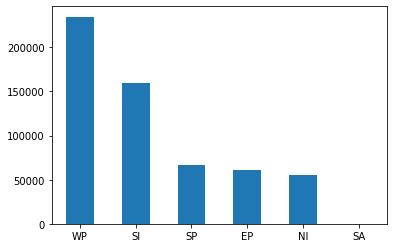

In [ ]:
# Get distirbution of hurricanes across each basin
hurricane_df.BASIN.value_counts().plot.bar()
plt.xticks(rotation=0)
plt.show()

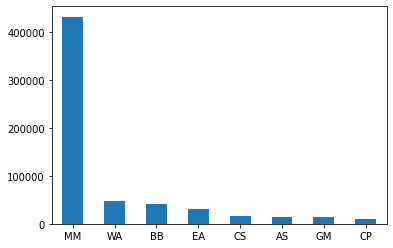

In [ ]:
# Get distribution of hurricanes across each sub-basin
hurricane_df.SUBBASIN.value_counts().plot.bar()
plt.xticks(rotation=0)
plt.show()

<AxesSubplot:xlabel='Year'>

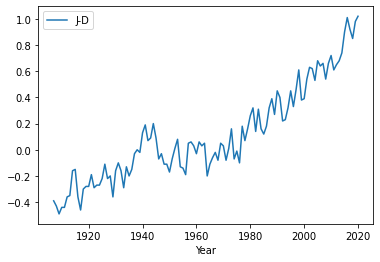

In [ ]:
# Plot annual temperature change across a period of time
final_set.plot(x="Year", y="J-D")

<Figure size 1440x1440 with 0 Axes>

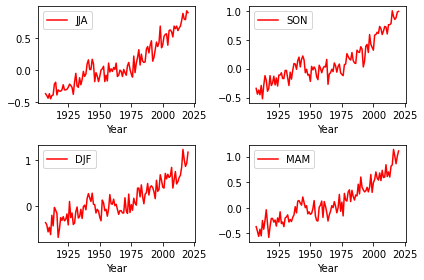

In [ ]:
# Plot quarterly temperature change across a period of time
plt.figure(figsize=(20,20))
fig, axes = plt.subplots(2,2)
final_set.plot(x="Year", y="JJA", color='red', ax=axes[0,0])
final_set.plot(x="Year", y="SON", color='red', ax=axes[0,1])
final_set.plot(x="Year", y="DJF", color='red', ax=axes[1,0])
final_set.plot(x="Year", y="MAM", color='red', ax=axes[1,1])
plt.tight_layout()
plt.show()

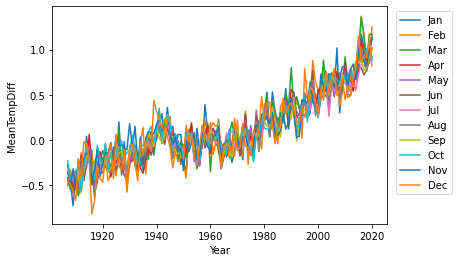

In [ ]:
# Plot monthly temperature change across a period of time
final_set.plot(x="Year", y=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"], 
               ylabel='MeanTempDiff')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

<AxesSubplot:xlabel='USA_PRES'>

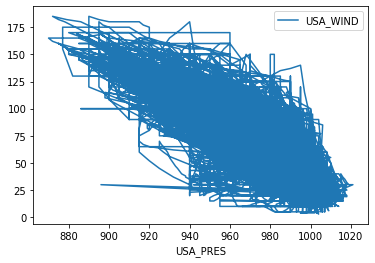

In [ ]:
final_set.plot(x="USA_PRES", y='USA_WIND')

In [ ]:
# Get correlation of attributes in final dataset
final_set.corr()

,NUMBER,LAT,LON,DIST2LAND,LANDFALL,USA_WIND,USA_PRES,USA_SSHS,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
NUMBER,1.000000,0.379508,0.049289,0.049595,0.046664,0.071360,-0.031373,0.078367,-0.152088,-0.161862,-0.162757,-0.145809,-0.162532,-0.167446,-0.173503,-0.173109,-0.172923,-0.177498,-0.158415,-0.167290,-0.147997,-0.170642,-0.171939,-0.167221,-0.160421,-0.175707,-0.169744
LAT,0.379508,1.000000,-0.011082,-0.009577,-0.015625,0.112335,-0.043539,0.116864,-0.108066,-0.065117,-0.066940,-0.072882,-0.075808,-0.077378,-0.077925,-0.077771,-0.081026,-0.076225,-0.064453,-0.076730,-0.066881,-0.075995,-0.075765,-0.068238,-0.076164,-0.080150,-0.073647
LON,0.049289,-0.011082,1.000000,-0.082774,-0.086123,0.025123,-0.131568,0.047534,-0.331187,-0.310560,-0.307156,-0.321530,-0.322901,-0.322318,-0.328486,-0.319674,-0.311887,-0.307618,-0.306698,-0.299605,-0.292953,-0.326270,-0.327675,-0.318188,-0.327127,-0.325298,-0.309430
DIST2LAND,0.049595,-0.009577,-0.082774,1.000000,0.999439,0.064555,-0.022160,0.044833,0.051465,0.045256,0.040145,0.053351,0.042955,0.047251,0.049837,0.038521,0.036406,0.041050,0.047688,0.044812,0.050285,0.047038,0.046565,0.044597,0.048801,0.042470,0.045449
LANDFALL,0.046664,-0.015625,-0.086123,0.999439,1.000000,0.060060,-0.018015,0.040927,0.053047,0.046259,0.041222,0.054498,0.044164,0.048461,0.051137,0.039749,0.037684,0.042182,0.048692,0.045986,0.051436,0.048238,0.047748,0.045634,0.050004,0.043759,0.046570
USA_WIND,0.071360,0.112335,0.025123,0.064555,0.060060,1.000000,-0.915919,0.849415,-0.033236,-0.014410,-0.002893,-0.016967,-0.020625,-0.024319,-0.012273,-0.022506,-0.023377,-0.024251,-0.017646,-0.019091,-0.013205,-0.018200,-0.018097,-0.010569,-0.020651,-0.019553,-0.020390
USA_PRES,-0.031373,-0.043539,-0.131568,-0.022160,-0.018015,-0.915919,1.000000,-0.784503,0.041324,0.040657,0.031881,0.035630,0.039209,0.042024,0.037071,0.047080,0.044916,0.042844,0.038068,0.035999,0.027965,0.040042,0.040791,0.037470,0.039353,0.043587,0.039279
USA_SSHS,0.078367,0.116864,0.047534,0.044833,0.040927,0.849415,-0.784503,1.000000,-0.056978,-0.040081,-0.014768,-0.036973,-0.041194,-0.049341,-0.038824,-0.042798,-0.052410,-0.051860,-0.042555,-0.041852,-0.035446,-0.042122,-0.041609,-0.029958,-0.042722,-0.045445,-0.045777
Year,-0.152088,-0.108066,-0.331187,0.051465,0.053047,-0.033236,0.041324,-0.056978,1.000000,0.863082,0.840327,0.895010,0.917504,0.911623,0.922252,0.916485,0.908422,0.911166,0.904766,0.908489,0.886404,0.938150,0.935429,0.884595,0.921813,0.931778,0.921620
Jan,-0.161862,-0.065117,-0.310560,0.045256,0.046259,-0.014410,0.040657,-0.040081,0.863082,1.000000,0.928310,0.911240,0.919184,0.924683,0.890283,0.890920,0.882197,0.875239,0.856855,0.844181,0.819836,0.935444,0.941774,0.972432,0.932427,0.902596,0.871518


In [ ]:
# Get count of different hurricane types in dataset
final_set['USA_SSHS'].value_counts()

-1.0    109686
 0.0     74602
 1.0     25635
-3.0     13361
 2.0     12221
 3.0     10055
 4.0      8464
 5.0      2221
-5.0      2153
-4.0      1317
-2.0       515
Name: USA_SSHS, dtype: int64

In [ ]:
final_set[final_set['SID']=='1879344S16059']

,SID,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,TRACK_TYPE,DIST2LAND,LANDFALL,USA_WIND,USA_PRES,USA_SSHS,STORM_SPEED,STORM_DIR,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON


In [ ]:
# remove duplicate storm ID's from dataset
dupes_dropped = final_set.drop_duplicates(subset=['SID'], keep='last', ignore_index=True)
dupes_dropped.head()

,SID,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,TRACK_TYPE,DIST2LAND,LANDFALL,USA_WIND,USA_PRES,USA_SSHS,STORM_SPEED,STORM_DIR,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1907018S13147,4.0,SP,EA,NOT_NAMED,1907-01-26,TS,-22.7069,138.078,main,0.0,0.0,25.0,1002.0,-1.0,13,160,1907.0,-0.43,-0.51,-0.27,-0.37,-0.46,-0.42,-0.35,-0.34,-0.34,-0.23,-0.46,-0.46,-0.39,-0.36,-0.36,-0.37,-0.37,-0.34
1,1908007S13140,3.0,SP,EA,NOT_NAMED,1908-01-10,TS,-20.5862,152.623,main,281.0,280.0,30.0,1000.0,-1.0,9,127,1908.0,-0.45,-0.33,-0.55,-0.45,-0.38,-0.39,-0.35,-0.46,-0.36,-0.44,-0.52,-0.49,-0.43,-0.43,-0.41,-0.46,-0.40,-0.44
2,1908072S18150,13.0,SP,EA,NOT_NAMED,1908-03-13,TS,-23.1536,149.034,main,0.0,0.0,45.0,992.0,-1.0,10,172,1908.0,-0.45,-0.33,-0.55,-0.45,-0.38,-0.39,-0.35,-0.46,-0.36,-0.44,-0.52,-0.49,-0.43,-0.43,-0.41,-0.46,-0.40,-0.44
3,1909030S14153,6.0,SP,EA,NOT_NAMED,1909-02-03,TS,-21.5412,156.974,main,528.0,505.0,45.0,990.0,-1.0,10,155,1909.0,-0.73,-0.46,-0.55,-0.59,-0.54,-0.52,-0.45,-0.34,-0.39,-0.40,-0.32,-0.57,-0.49,-0.48,-0.56,-0.56,-0.44,-0.37
4,1910025S13148,6.0,SP,EA,NOT_NAMED,1910-01-26,TS,-13.8828,146.928,main,211.0,190.0,50.0,988.0,-1.0,5,214,1910.0,-0.41,-0.41,-0.51,-0.43,-0.34,-0.39,-0.35,-0.37,-0.39,-0.41,-0.55,-0.67,-0.44,-0.43,-0.46,-0.42,-0.37,-0.45


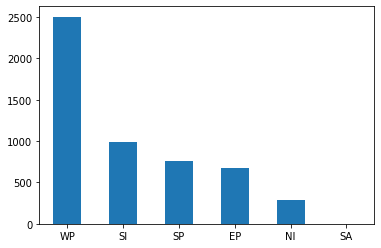

In [ ]:
# Plot of number of storms in each basin across the years
dupes_dropped.BASIN.value_counts().plot.bar()
plt.xticks(rotation=0)
plt.show()

In [ ]:
basin_sev = dupes_dropped[dupes_dropped['USA_SSHS']>-2].groupby(['BASIN', 'USA_SSHS'])['SID'].count().reset_index()

(0.0, 850.0)

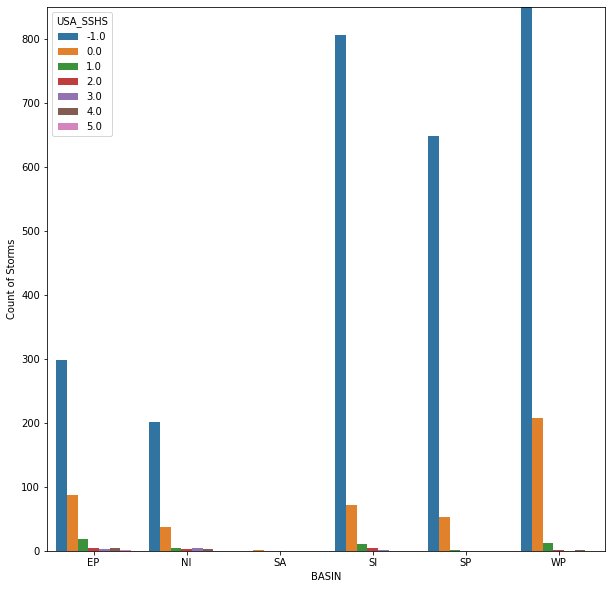

In [ ]:
# Plot of storm count v/s basin with storm category as hue
plt.figure(figsize=(10,10))
sns.barplot(data=basin_sev, x='BASIN', y='SID', hue='USA_SSHS')
plt.ylabel('Count of Storms')
plt.ylim((0,850))

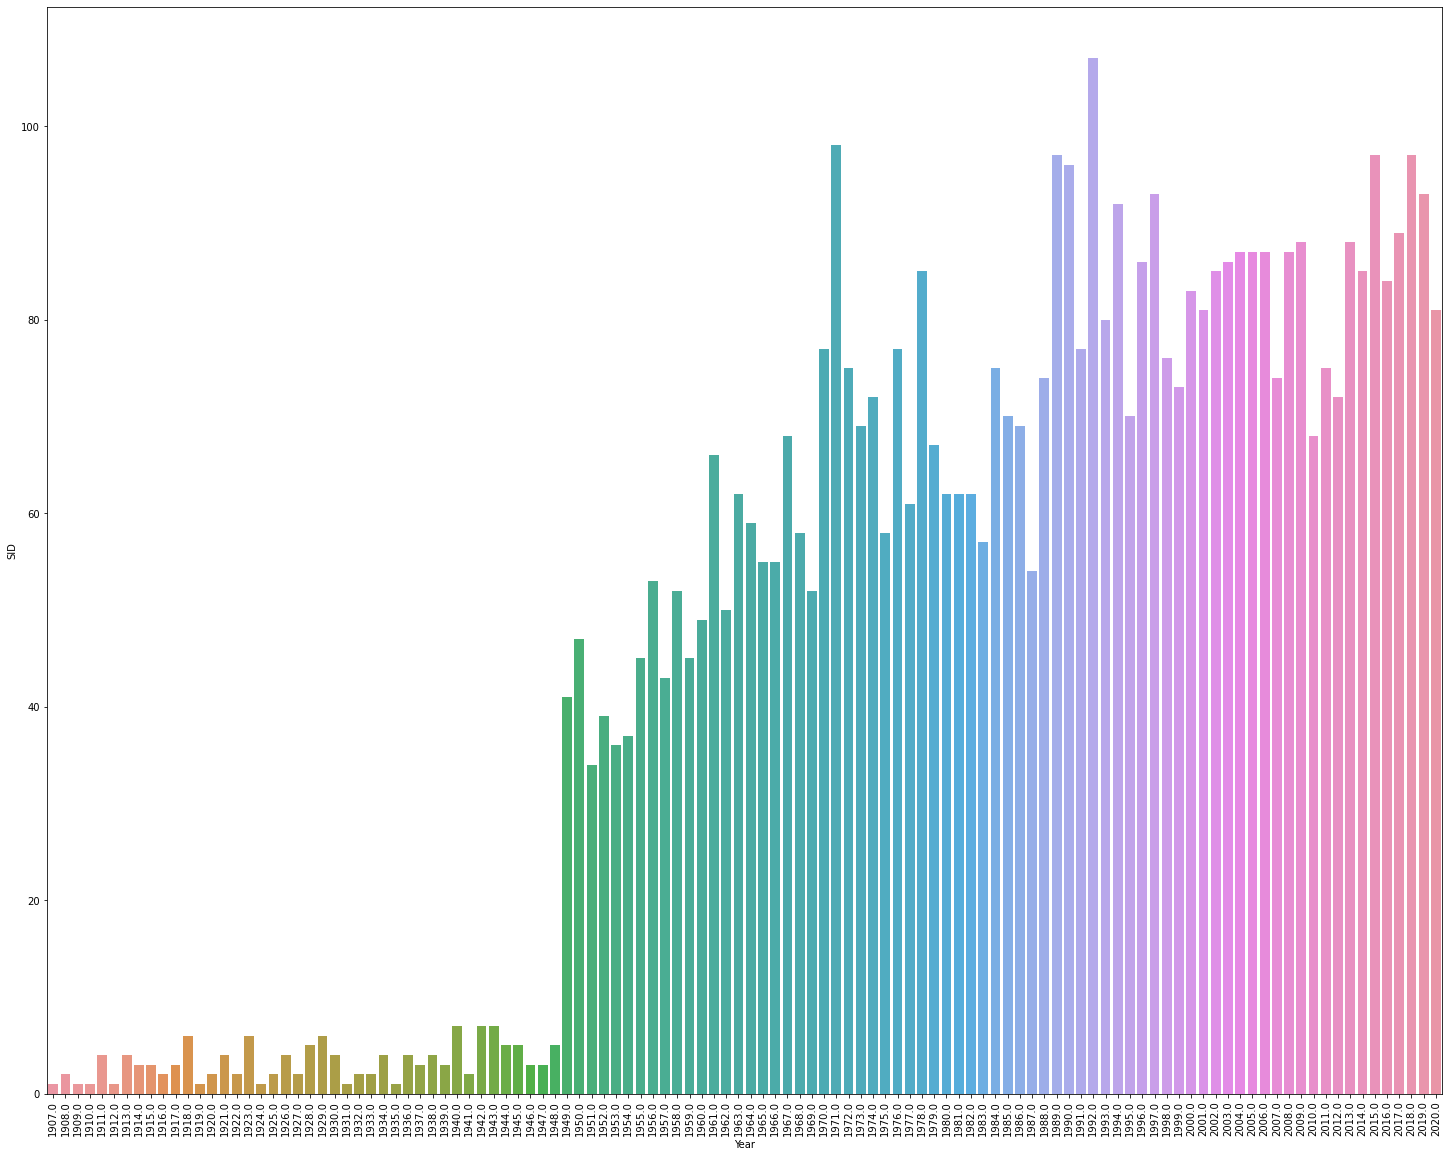

In [ ]:
# Group dataset based on year and get count of no. of hurricanes in each year
year_dupedrop = dupes_dropped.groupby('Year')['SID'].count().reset_index()

# Plot no. of hurricanes in a year acroos the years
plt.figure(figsize=(25,20))
sns.barplot(x='Year', y='SID', data=year_dupedrop)
plt.xticks(rotation=90)
plt.show()

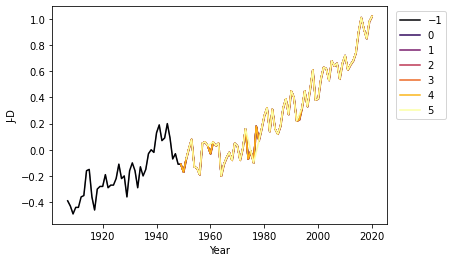

In [ ]:
# Plot annual temperature change across a period of time wrt to Category of Storms.
sns.lineplot(x="Year", y='J-D', data=final_set[final_set['USA_SSHS']>-2], hue='USA_SSHS', palette='inferno')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

In [ ]:
# Get count of unique storms in dataset
final_set['SID'].nunique()

5229

In [ ]:
#final_set.to_csv('FINAL_DATA.csv')

In [ ]:
final = year_dupedrop.merge(temp_df, how='inner', on='Year')
final = final[['Year', 'J-D', 'SID']]
final = final.iloc[42:, :]

In [ ]:
final

,Year,J-D,SID
42,1949.0,-0.11,41
43,1950.0,-0.17,47
44,1951.0,-0.07,34
45,1952.0,0.01,39
46,1953.0,0.08,36
47,1954.0,-0.13,37
48,1955.0,-0.14,45
49,1956.0,-0.19,53
50,1957.0,0.05,43
51,1958.0,0.06,52


In [ ]:
data = final.iloc[:,1]
y = final.iloc[:,-1]

In [ ]:
# Data for classification
class_cols = [2,3,6,10,11,12,13,15,16,14]
class_df = final_set.iloc[:, class_cols]
class_df.reset_index(drop=True, inplace=True)

# Convert attribute type from object to float
class_df['STORM_SPEED'] = class_df['STORM_SPEED'].astype('float64')
class_df['STORM_DIR'] = class_df['STORM_SPEED'].astype('float64')

# Label Encode
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

class_df['BASIN'] = encode.fit_transform(class_df['BASIN'])
class_df['SUBBASIN'] = encode.fit_transform(class_df['SUBBASIN'])
class_df['NATURE'] = encode.fit_transform(class_df['NATURE'])

class_df = class_df[class_df['USA_SSHS']>-2]

class_df.reset_index(drop=True, inplace=True)
display(class_df)

,BASIN,SUBBASIN,NATURE,DIST2LAND,LANDFALL,USA_WIND,USA_PRES,STORM_SPEED,STORM_DIR,USA_SSHS
0,4,3,5,239.0,205.0,40.0,994.0,8.0,8.0,-1.0
1,4,3,5,0.0,0.0,40.0,993.0,5.0,5.0,-1.0
2,4,3,5,0.0,0.0,40.0,993.0,4.0,4.0,-1.0
3,4,3,5,0.0,0.0,40.0,993.0,3.0,3.0,-1.0
4,4,3,5,10.0,10.0,35.0,998.0,5.0,5.0,-1.0
...,...,...,...,...,...,...,...,...,...,...
242879,5,4,3,399.0,339.0,25.0,1004.0,9.0,9.0,-1.0
242880,5,4,3,339.0,275.0,25.0,1004.0,12.0,12.0,-1.0
242881,5,4,3,275.0,254.0,25.0,1005.0,10.0,10.0,-1.0
242882,5,4,3,254.0,227.0,25.0,1004.0,8.0,8.0,-1.0


In [ ]:
class_df.corr()

,BASIN,SUBBASIN,NATURE,DIST2LAND,LANDFALL,USA_WIND,USA_PRES,STORM_SPEED,STORM_DIR,USA_SSHS
BASIN,1.000000,0.235333,-0.012441,-0.039731,-0.045132,0.040550,-0.126791,0.154229,0.154229,0.030591
SUBBASIN,0.235333,1.000000,0.100616,0.086257,0.088172,0.019435,-0.049225,0.029024,0.029024,-0.001715
NATURE,-0.012441,0.100616,1.000000,0.041163,0.040654,0.140382,-0.106052,-0.241022,-0.241022,0.153105
DIST2LAND,-0.039731,0.086257,0.041163,1.000000,0.999437,0.082900,-0.039453,0.053263,0.053263,0.081256
LANDFALL,-0.045132,0.088172,0.040654,0.999437,1.000000,0.078314,-0.035235,0.043766,0.043766,0.076821
USA_WIND,0.040550,0.019435,0.140382,0.082900,0.078314,1.000000,-0.912928,0.052898,0.052898,0.930897
USA_PRES,-0.126791,-0.049225,-0.106052,-0.039453,-0.035235,-0.912928,1.000000,-0.053231,-0.053231,-0.858962
STORM_SPEED,0.154229,0.029024,-0.241022,0.053263,0.043766,0.052898,-0.053231,1.000000,1.000000,0.026463
STORM_DIR,0.154229,0.029024,-0.241022,0.053263,0.043766,0.052898,-0.053231,1.000000,1.000000,0.026463
USA_SSHS,0.030591,-0.001715,0.153105,0.081256,0.076821,0.930897,-0.858962,0.026463,0.026463,1.000000


In [ ]:
class_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242884 entries, 0 to 260229
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   BASIN        242884 non-null  int32  
 1   SUBBASIN     242884 non-null  int32  
 2   NATURE       242884 non-null  int32  
 3   DIST2LAND    242884 non-null  float64
 4   LANDFALL     242884 non-null  float64
 5   USA_WIND     242884 non-null  float64
 6   USA_PRES     242884 non-null  float64
 7   STORM_SPEED  242884 non-null  float64
 8   STORM_DIR    242884 non-null  float64
 9   USA_SSHS     242884 non-null  float64
dtypes: float64(7), int32(3)
memory usage: 17.6 MB


## Predict relationship between Temperature and Frequency of Storms

#### Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split

data_array = np.array(data).reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(data_array, y, test_size=0.2)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
y_pred = lin_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error = {mse}')
print(f'Root Mean Squared Error = {sqrt(mse)}')
print(f'R2 score = {r2_score(y_test, y_pred)}')

Mean Squared Error = 198.4684036135648
Root Mean Squared Error = 14.087881445184182
R2 score = 0.5451403547471624


#### Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

lm = LinearRegression()

mse_cv = cross_val_score(lm, x_train, y_train, scoring='neg_mean_squared_error', cv=10)
abs_mse = abs(mse_cv.mean())
# print('MSE Values: \n', mse_cv)
print(f'CV Mean Squared Error = {abs_mse}')
print(f'CV Root Mean Squared Error = {sqrt(abs_mse)}\n')

# r2_cv = cross_val_score(lm, x_train, y_train, scoring='r2', cv=10)
# print('R2 Values: \n', r2_cv)
# print(f'CV R2 score = {r2_cv.mean()}')

CV Mean Squared Error = 181.25124299959003
CV Root Mean Squared Error = 13.462958181602959



Text(0, 0.5, 'No. of Storms')

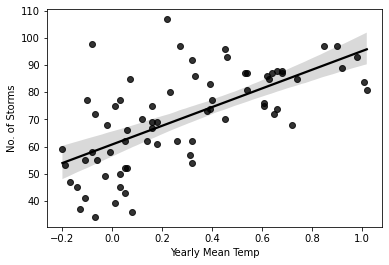

In [ ]:
sns.regplot(x='J-D', y='SID', data=final, color='black')
plt.xlabel('Yearly Mean Temp')
plt.ylabel('No. of Storms')

## Classification of Storm Category

In [ ]:
class_df['USA_SSHS'].value_counts()

-1.0    109686
 0.0     74602
 1.0     25635
 2.0     12221
 3.0     10055
 4.0      8464
 5.0      2221
Name: USA_SSHS, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(class_df.iloc[:,:-1], class_df['USA_SSHS'], test_size=0.2,
                                                   stratify=class_df['USA_SSHS'])

#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [ ]:
knn_model = KNeighborsClassifier()
params = [{'n_neighbors': [2, 5, 10, 15],
         'weights': ['uniform', 'distance'],
         'leaf_size': [15, 20],
          'metric':['minkowski', 'euclidean', 'manhattan']}]

gs_knn = GridSearchCV(knn_model,
                      param_grid=params,
                      scoring='accuracy',
                      cv=10)
gs_knn.fit(x_train, y_train)
print('Best Parameters: ', gs_knn.best_params_)
print('CV Accuracy: ', gs_knn.score(x_train, y_train))

Best Parameters:  {'leaf_size': 15, 'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
CV Accuracy:  0.9991817072982445


In [ ]:
knn_df = pd.DataFrame(gs_knn.cv_results_)
knn_df[['param_n_neighbors','param_weights','param_metric','param_leaf_size','rank_test_score']].tail()

,param_n_neighbors,param_weights,param_metric,param_leaf_size,rank_test_score
43,5,distance,manhattan,20,5
44,10,uniform,manhattan,20,11
45,10,distance,manhattan,20,1
46,15,uniform,manhattan,20,7
47,15,distance,manhattan,20,3


In [ ]:
knn = KNeighborsClassifier(n_neighbors=10, weights='distance', leaf_size=15, metric='manhattan')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

# Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


print(confusion_matrix(y_test, y_pred))
print('\nAccuracy: ', accuracy_score(y_test, y_pred))
print('\n', classification_report(y_test, y_pred))

[[18821  2521   344   133    67    43     8]
 [ 1331 13414   176     0     0     0     0]
 [   41   203  4784    98     1     0     0]
 [    4     0   191  2131   116     2     0]
 [    4     0    12   200  1702    93     0]
 [    1     0     0     2   145  1524    21]
 [    1     0     0     0     3   124   316]]

Accuracy:  0.87885213166725

               precision    recall  f1-score   support

        -1.0       0.93      0.86      0.89     21937
         0.0       0.83      0.90      0.86     14921
         1.0       0.87      0.93      0.90      5127
         2.0       0.83      0.87      0.85      2444
         3.0       0.84      0.85      0.84      2011
         4.0       0.85      0.90      0.88      1693
         5.0       0.92      0.71      0.80       444

    accuracy                           0.88     48577
   macro avg       0.87      0.86      0.86     48577
weighted avg       0.88      0.88      0.88     48577



#### Decision Tree

In [ ]:
# Decision Tree Cross Validation
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

params = [{'splitter':['best', 'random'], 'criterion':['gini', 'entropy']}]
dtree_cv = DecisionTreeClassifier()

dt = GridSearchCV(dtree_cv, param_grid=params, cv=10, return_train_score=False)
dt.fit(x_train, y_train)

print('Best Parameters: ', dt.best_params_)
print('CV Accuracy: ', dt.score(x_train, y_train))
#print('\nCV Results: \n', dt.cv_results_)

Best Parameters:  {'criterion': 'gini', 'splitter': 'best'}
CV Accuracy:  0.9991868537932241


In [ ]:
dt_df = pd.DataFrame(dt.cv_results_)
dt_df[['params','rank_test_score']]

,params,rank_test_score
0,"{'criterion': 'gini', 'splitter': 'best'}",1
1,"{'criterion': 'gini', 'splitter': 'random'}",4
2,"{'criterion': 'entropy', 'splitter': 'best'}",2
3,"{'criterion': 'entropy', 'splitter': 'random'}",3


In [ ]:
# Decision Tree Classifier 
dtree = DecisionTreeClassifier(criterion = 'gini', splitter='best')
dtree.fit(x_train, y_train)

# Predicting the Test set results
y_pred = dtree.predict(x_test)
dtree_acc = accuracy_score(y_test, y_pred)
print(f'Decision Tree Accuracy: {dtree_acc}')
print(confusion_matrix(y_test, y_pred))
print('\n', classification_report(y_test, y_pred))

Decision Tree Accuracy: 0.9475883648640303
[[20730   870   206    53    39    35     4]
 [  967 13954     0     0     0     0     0]
 [  195     0  4932     0     0     0     0]
 [   80     0     0  2364     0     0     0]
 [   51     0     0     0  1960     0     0]
 [   33     0     0     0     0  1660     0]
 [   13     0     0     0     0     0   431]]

               precision    recall  f1-score   support

        -1.0       0.94      0.94      0.94     21937
         0.0       0.94      0.94      0.94     14921
         1.0       0.96      0.96      0.96      5127
         2.0       0.98      0.97      0.97      2444
         3.0       0.98      0.97      0.98      2011
         4.0       0.98      0.98      0.98      1693
         5.0       0.99      0.97      0.98       444

    accuracy                           0.95     48577
   macro avg       0.97      0.96      0.96     48577
weighted avg       0.95      0.95      0.95     48577



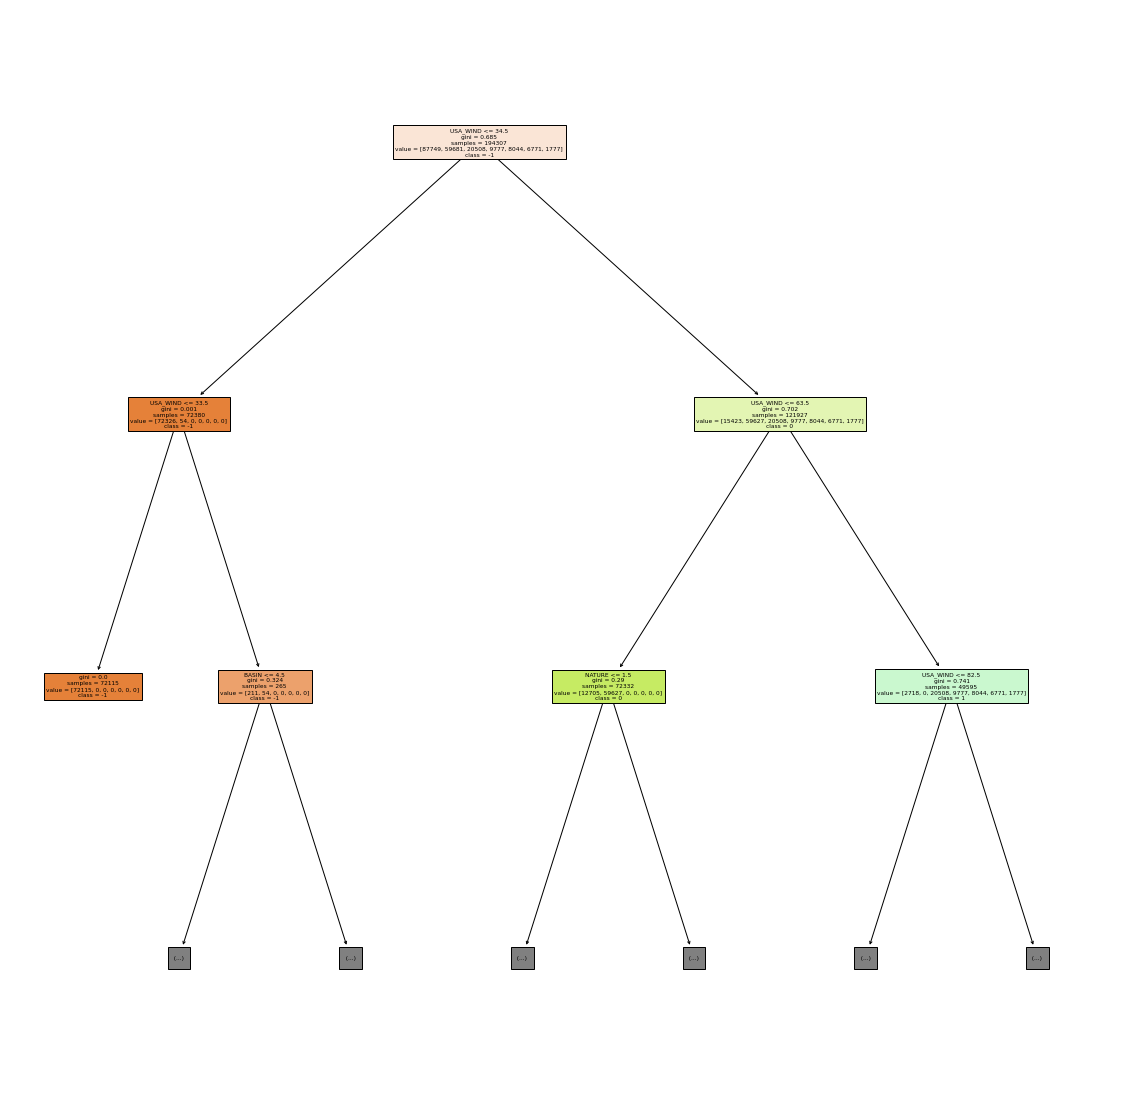

In [ ]:
# Plot 
features = list(x_train.columns)
classes = ['-1','0','1','2','3','4','5']
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(dtree, feature_names=features, class_names=classes, max_depth=2, filled=True, )

#### Random Forest

In [ ]:
# # Random Forest Cross Validation
from sklearn.ensemble import RandomForestClassifier

# params = {'n_estimators': [20,50,100,150], 'max_features': ['auto', 'sqrt'], 'criterion': ['gini', 'entropy']}
# rf = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=10, return_train_score=False)
# rf.fit(x_train, y_train)

# print('Best Parameters: ', rf.best_params_)
# print('CV Accuracy: ', rf.score(x_train, y_train))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
params = {'n_estimators': [20,50,100,150], 'max_features': ['auto', 'sqrt'], 'criterion': ['gini', 'entropy']}
rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=params, cv=10, return_train_score=False)
rf.fit(x_train, y_train)

print('Best Parameters: ', rf.best_params_)
print('CV Accuracy: ', rf.score(x_train, y_train))

Best Parameters:  {'n_estimators': 100, 'max_features': 'auto', 'criterion': 'entropy'}
CV Accuracy:  0.9990942168835915


In [ ]:
rf_df = pd.DataFrame(rf.cv_results_)
rf_df[['params', 'rank_test_score']]

,params,rank_test_score
0,"{'n_estimators': 50, 'max_features': 'auto', '...",8
1,"{'n_estimators': 150, 'max_features': 'sqrt', ...",2
2,"{'n_estimators': 20, 'max_features': 'auto', '...",10
3,"{'n_estimators': 50, 'max_features': 'sqrt', '...",7
4,"{'n_estimators': 20, 'max_features': 'auto', '...",9
5,"{'n_estimators': 100, 'max_features': 'auto', ...",1
6,"{'n_estimators': 100, 'max_features': 'sqrt', ...",6
7,"{'n_estimators': 100, 'max_features': 'sqrt', ...",5
8,"{'n_estimators': 150, 'max_features': 'auto', ...",4
9,"{'n_estimators': 150, 'max_features': 'sqrt', ...",3


In [ ]:
#Import Random Forest Model

rando = RandomForestClassifier(n_estimators=150, criterion='gini', max_features='auto')

#Train the model using the training sets y_pred=clf.predict(X_test)
rando.fit(x_train,y_train)

y_pred = rando.predict(x_test)

rando_acc = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {rando_acc}')
print(confusion_matrix(y_test, y_pred))
print('\n', classification_report(y_test, y_pred))

Random Forest Accuracy: 0.9628424974782305
[[20573   976   217    75    48    39     9]
 [  377 14544     0     0     0     0     0]
 [   48     0  5079     0     0     0     0]
 [   10     0     0  2434     0     0     0]
 [    1     0     0     0  2010     0     0]
 [    3     0     0     0     0  1689     1]
 [    1     0     0     0     0     0   443]]

               precision    recall  f1-score   support

        -1.0       0.98      0.94      0.96     21937
         0.0       0.94      0.97      0.96     14921
         1.0       0.96      0.99      0.97      5127
         2.0       0.97      1.00      0.98      2444
         3.0       0.98      1.00      0.99      2011
         4.0       0.98      1.00      0.99      1693
         5.0       0.98      1.00      0.99       444

    accuracy                           0.96     48577
   macro avg       0.97      0.98      0.98     48577
weighted avg       0.96      0.96      0.96     48577

